# Exploring spatial data

### Explore spatial data (geojson-format)

In [1]:
import os
import geopandas

# Polygonmap as .json-File
polys = geopandas.read_file("GEN_A4_GEMEINDEN_2019_epsg4326.json")

# Show data structure and first records
print("nrows, ncols", polys.shape)
print("-------------------------------------------------------")
print("Type:", type(polys))


nrows, ncols (162, 6)
-------------------------------------------------------
Type: <class 'geopandas.geodataframe.GeoDataFrame'>


In [2]:
# Object is GeoDataFrame (includes geometry of polygons)
polys


,BFS,NAME,BEZIRKSNAM,ART_TEXT,ART_CODE,geometry
0,117,Hinwil,Hinwil,Gemeinde,1,"POLYGON ((8.84778 47.32410, 8.85861 47.32162, ..."
1,131,Adliswil,Horgen,Gemeinde,1,"POLYGON ((8.53489 47.32502, 8.53662 47.32100, ..."
2,3,Bonstetten,Affoltern,Gemeinde,1,"POLYGON ((8.46026 47.33326, 8.46753 47.33410, ..."
3,154,Küsnacht (ZH),Meilen,Gemeinde,1,"POLYGON ((8.60977 47.33352, 8.61127 47.32749, ..."
4,135,Kilchberg (ZH),Horgen,Gemeinde,1,"POLYGON ((8.54625 47.33441, 8.54875 47.33113, ..."
...,...,...,...,...,...,...
157,192,Egg,Uster,Gemeinde,1,"POLYGON ((8.70571 47.32027, 8.70343 47.31724, ..."
158,115,Gossau (ZH),Hinwil,Gemeinde,1,"POLYGON ((8.77442 47.31964, 8.78551 47.31752, ..."
159,29,Flurlingen,Andelfingen,Gemeinde,1,"POLYGON ((8.63514 47.69119, 8.64204 47.69104, ..."
160,27,Feuerthalen,Andelfingen,Gemeinde,1,"POLYGON ((8.64708 47.69551, 8.65089 47.69380, ..."


### Explore attribute data (.csv-format)

In [3]:
import pandas as pd
data = pd.read_excel('municipalities_kt_zh_data.xlsx', index_col=None)

print(type(data))

data.head(5)


<class 'pandas.core.frame.DataFrame'>


,BFS,municipality_name,residents,percentage_foreigners,area_km2,residents_per_km2
0,21,Adlikon,665,9.2,6.58,101.063830
1,131,Adliswil,18803,35.3,7.77,2419.948520
2,241,Aesch (ZH),1348,15.7,5.24,257.251908
3,1,Aeugst am Albis,1941,12.7,7.91,245.385588
4,2,Affoltern am Albis,12146,27.6,10.59,1146.931067


In [4]:
data.describe()


,BFS,residents,percentage_foreigners,area_km2,residents_per_km2
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,124.969136,9269.549383,18.917284,10.251914,795.841253
std,83.345157,33263.791485,8.242690,10.075273,801.817314
min,1.000000,342.000000,5.100000,1.590000,64.950712
25%,56.250000,1892.750000,12.500000,5.060000,231.625802
50%,112.500000,4396.000000,18.300000,7.885000,552.378602
75%,195.750000,7837.750000,24.450000,12.012500,1014.056106
max,298.000000,409241.000000,46.200000,87.930000,4654.168088


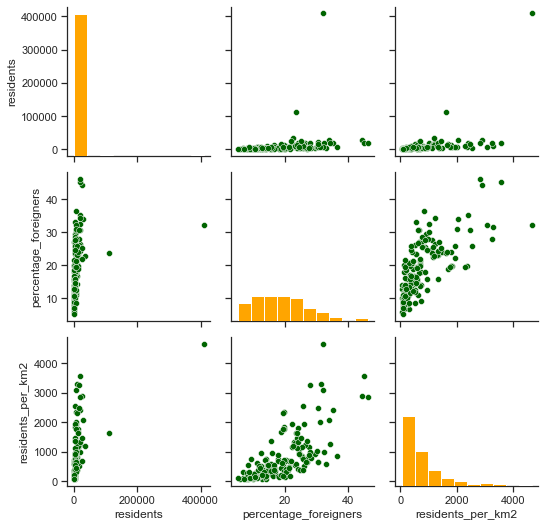

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

g = sns.PairGrid(data[['residents', 'percentage_foreigners', 'residents_per_km2']], height=2.5, aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen')
g.map_lower(sns.scatterplot, color='darkgreen')
g.map_diag(plt.hist, color='orange')


### Find useful [interactive] base maps

In [7]:
from ipyleaflet import Map, basemaps

center = [47.50323, 8.72709]
zoom = 16

# openStreetMap
Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)


Map(center=[47.50323, 8.72709], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [8]:
# Sattelite image (Esri.WorldImagery)
center = [47.50323, 8.72709]
zoom = 16
Map(basemap=basemaps.Esri.WorldImagery, center=center, zoom=zoom)


Map(center=[47.50323, 8.72709], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

### Choropleth map for data exploration

In [9]:
import folium 
import pandas as pd
import branca.colormap as cm

# Function for hiding original legend
def folium_del_legend(choropleth: folium.Choropleth):
    del_list = []
    for child in choropleth._children:
        if child.startswith('color_map'):
            del_list.append(child)
            for del_item in del_list:
                choropleth._children.pop(del_item)
                return choropleth

# Geojson and data
polys = 'GEN_A4_GEMEINDEN_2019_epsg4326.json'
data  = pd.read_excel('municipalities_kt_zh_data.xlsx')

# Bins for color-range of the map
bins = list(data['residents_per_km2'].quantile([0.00, 0.25, 0.50, 0.75, 1.00]))

# Initializing the map
m = folium.Map(location=[47.44, 8.65], zoom_start=10)

# Map-Settings
folium.Choropleth(
        geo_data=polys,
        name='choropleth',
        data=data,
        columns=['BFS', 'residents_per_km2'],
        key_on='feature.properties.BFS',
        fill_color='RdGy',
        fill_opacity=0.7,
        line_opacity=0.5,
        legend_name='Number of residents',
        bins=bins,
        reset=True
).add_to(m)

# Layer controls
folium.LayerControl(collapsed=True).add_to(m)

# Plot map
m

# Save map as HTML
# m.save('map.html')


### Spatial data and maps:
https://ipyleaflet.readthedocs.io/en/latest/

https://python-visualization.github.io/folium/quickstart.html

https://deparkes.co.uk/2016/06/10/folium-map-tiles/

https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd

https://www.nagarajbhat.com/post/folium-visualization